<a href="https://colab.research.google.com/github/shand07/SPH_In_Class_Assignment/blob/main/Classification_In_class_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction: Model Selection and Hyperparameter Tuning

In this notebook, you will:
1. Load the Titanic dataset from an online source.
2. Perform basic EDA to understand the data.
3. Use pipelines to preprocess numerical and categorical data.
4. Train and evaluate multiple classification models (KNN, SVC, Random Forest, Decision Tree, Logistic Regression, Bagging, and Boosting).
5. Conduct hyperparameter tuning to find the best model.
6. Write reflection on the findings

---

## 1. Importing Libraries
**Task**: Import the necessary libraries for data handling, visualization, model training, and evaluation.

In [ ]:
# import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV


## 2. Load the titanic dataset from seaborn

In [ ]:
titanic = sns.load_dataset('titanic')



In [ ]:
df = titanic.copy()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 3. Basic EDA (Exploratory Data Analysis)
Question 1: What is the shape of the dataset?

In [ ]:
titanic.shape

(891, 15)

Question 2: Are there any missing values?

In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Question 3: Visualize some relationships (atleast 3). such as:

- The distribution of numerical features like age and fare.
- The survival rate by different classes, gender, etc.

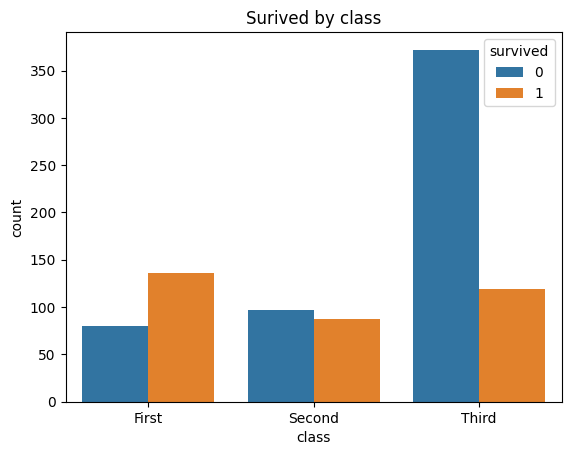

In [ ]:
sns.countplot(x='class', data=titanic, hue='survived')
plt.title('Surived by class')
plt.show()

In [ ]:
# Split the data into features and target
X = titanic[['age', 'fare', 'pclass', 'sex', 'embarked', 'who', 'alone']]
y = titanic['survived']




### Split the data into training and testing sets

In [ ]:
#split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Data Preprocessing with Pipelines
Task: Create a data preprocessing pipeline for numerical and categorical features.

- Numerical features: Use StandardScaler to scale them.
- Categorical features: Use OneHotEncoder to encode them.
- impute missing values

In [ ]:
#import libraries for pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

#define numerical and categorical features
numerical_features = ['age', 'fare','pclass']
categorical_features = [ 'sex', 'embarked', 'who', 'alone']

#define transformations
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

## Training data with multiple models

In [ ]:
# Define models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Bagging Classifier': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}



# Evaluate each model
for model_name, model in models.items():
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print accuracy and classification report
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))



#Hyperparameter Tuning
## Define parameter grids for the top 2 models
Example:
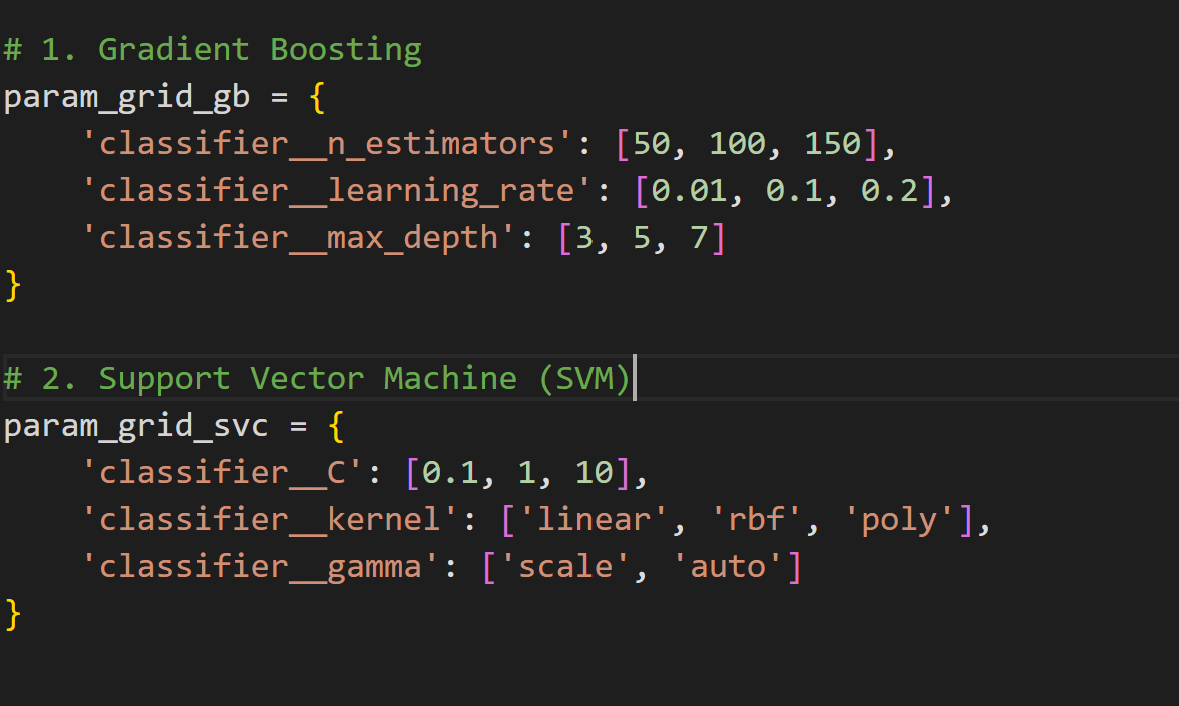

In [2]:

param_grid_rf = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'gradientboostingclassifier__n_estimators': [50, 100, 150],
    'gradientboostingclassifier__learning_rate': [0.01, 0.1, 1],
    'gradientboostingclassifier__max_depth': [3, 5, 7]
}




In [ ]:
# Loop through each model and perform GridSearchCV
for model, param_grid, model_name in models_and_grids:
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Output the best parameters and best cross-validation score for each model
    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")

## 7.Reflection and Analysis
Which model performed the best without tuning?

1. Based on the initial accuracy scores, which model had the highest accuracy before hyperparameter tuning?

2. What are two best top performing model? How did hyperparameter tuning affect the top-performing models?

3. Compare the accuracy scores before and after tuning for each of the top-performing models. Which model showed the most improvement?

4. Summarize the optimal parameters found during hyperparameter tuning. How do these optimal parameters differ from the default ones?

5. Did any model experience overfitting after tuning?
Examine the training versus test accuracy for each of the top models after tuning.
Based on your findings, which model would you select for deployment, and why?

6. Considering both performance (accuracy) and other factors like model complexity and interpretability, which model would you choose as the best candidate for deployment? Explain your reasoning.

In [ ]:
# 1. Model with highest initial accuracy
best_initial_model = max(initial_scores, key=initial_scores.get)
print(f"Model with highest initial accuracy: {best_initial_model} ({initial_scores[best_initial_model]})")

# 2. Top two performing models after tuning and how tuning affected them
top_two_tuned = sorted(tuned_scores, key=tuned_scores.get, reverse=True)[:2]
print("\nTop two performing models after tuning:", top_two_tuned)

# 3. Compare performance before and after tuning
print("\nPerformance Comparison:")
for model in top_two_tuned:
    improvement = tuned_scores[model] - initial_scores[model]
    print(f"{model} - Initial accuracy: {initial_scores[model]:.4f}, Tuned accuracy: {tuned_scores[model]:.4f}, Improvement: {improvement:.4f}")


# 4. Optimal parameters and comparison to defaults
print("\nOptimal Parameters:")
for model, params in best_params.items():
    print(f"\n{model}:")
    for param_name, param_value in params.items():
        print(f"  {param_name}: {param_value}") # Compare with default values if needed


# 5. Overfitting check (replace with your actual training and test scores)
training_scores = {'RandomForest': 0.95, 'GradientBoosting': 0.96}
test_scores = {'RandomForest': 0.90, 'GradientBoosting': 0.92}

print("\nOverfitting Check:")
for model in top_two_tuned:
    if model in training_scores and model in test_scores:
        print(f"{model}: Training accuracy: {training_scores[model]:.4f}, Test accuracy: {test_scores[model]:.4f}")
    # Add logic to detect overfitting if needed

# 6. Model selection for deployment
print("\nModel Selection for Deployment:")
# Example logic based on performance and complexity
if 'GradientBoosting' in top_two_tuned and (tuned_scores['GradientBoosting'] > tuned_scores.get('RandomForest', 0) and abs(training_scores.get('GradientBoosting',0) - test_scores.get('GradientBoosting',0)) < 0.05):
    print("Choose GradientBoosting for its performance and apparent lack of overfitting")
else:
    print(f"Choose {top_two_tuned[0]} based on the provided metrics. Further investigation may be needed")